# Domain uniqueness analysis

## Load data from Gaffer

In [1]:
import requests
import json
import sys
import gaffer
import threatgraph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
g = threatgraph.Gaffer()
g.use_cert()

In [3]:
op = gaffer.OperationChain([
    gaffer.GetAllElements(entities=[
        gaffer.ViewGroup("device", exclude=["count", "time"])
    ], edges=None),
    gaffer.GetWalks(
        operations=[
            gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("hasip", exclude=["count", "time"])
                ], entities=None, include="OUTGOING")
            ]), 
            gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("dnsquery")
                ], entities=None, include="OUTGOING")
            ]), 
             gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("indomain", exclude=["count", "time"])
                ], entities=None, include="OUTGOING")
            ])
        ],
        limit=10000000)
])

query = op.encode()
res = g.execute_chunked(op)

things = {}
timestamps = {}
counts = {}

all_things = set()
all_devices = set()

for v in res:

    try:
        ent = json.loads(v)

    except Exception:
        continue

    dev = list(ent["entities"][0].keys())[0]
    thing = list(ent["entities"][3].keys())[0]
    
    k = (dev, thing)

    if not k in counts:
        counts[k] = 0
        timestamps[k] = set()
        
    if not dev in things:
        things[dev] = set()

    ts = ent["edges"][1][0]["properties"]["time"]["uk.gov.gchq.gaffer.time.RBMBackedTimestampSet"]["timestamps"]
    cnt = ent["edges"][1][0]["properties"]["count"]

    counts[k] += cnt
    timestamps[k].update(ts)
    things[dev].add(thing)
    all_things.add(thing)
    all_devices.add(dev)

In [4]:
all_devices = list(all_devices)
all_things = list(all_things)

## Construct heatmap matrix

In [5]:
def get_counts(thing, dev):
    if thing in things[dev]: return counts[(dev, thing)]
    return 0

datas = [ [ get_counts(thing, dev) for dev in all_devices ] for thing in all_things]
df = pd.DataFrame(datas, index=all_things, columns=all_devices)
df

,LAPTOP-1I501C4U,calcannea-cb,tirasse-mac,turing-chromebook,dgmac,daniel-chromebook,terrestrial-mac,theatergoing-mac,misskitty-mac,abroad-android,...,DESKTOP-PIMD8C0,minesweepers-mac,ludicrous-mac,traverses-mac,steamverne-mac,turing-minimacbook,boundless-mac,serotinal-mac,MalcomWare-PC,essential-chrome
foydgmjtneeto.local,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
lashback.com,0,0,0,0,0,0,0,0,6,0,...,0,2,0,0,0,0,0,0,0,0
mopinion.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lightboxcdn.com,0,0,0,2,0,0,2,0,4,0,...,0,0,0,0,2,0,2,0,0,0
scottishrugby.org,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fastly.com,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
cushmanwakefield.com,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
townnews.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pythonprogramming.net,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aapi.io,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df["score"] = df.sum(axis=1)

In [7]:
df

,LAPTOP-1I501C4U,calcannea-cb,tirasse-mac,turing-chromebook,dgmac,daniel-chromebook,terrestrial-mac,theatergoing-mac,misskitty-mac,abroad-android,...,minesweepers-mac,ludicrous-mac,traverses-mac,steamverne-mac,turing-minimacbook,boundless-mac,serotinal-mac,MalcomWare-PC,essential-chrome,score
foydgmjtneeto.local,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
lashback.com,0,0,0,0,0,0,0,0,6,0,...,2,0,0,0,0,0,0,0,0,9
mopinion.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
lightboxcdn.com,0,0,0,2,0,0,2,0,4,0,...,0,0,0,2,0,2,0,0,0,18
scottishrugby.org,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
fastly.com,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
cushmanwakefield.com,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,3
townnews.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
pythonprogramming.net,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aapi.io,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
my_fn = lambda x: np.log(x + 0.001)

In [9]:
df2 = df.copy()
df2[all_devices] = df2[all_devices].apply(my_fn)
df2 = df2.sort_values(by="score", ascending=False)

In [10]:
df2[:25]

,LAPTOP-1I501C4U,calcannea-cb,tirasse-mac,turing-chromebook,dgmac,daniel-chromebook,terrestrial-mac,theatergoing-mac,misskitty-mac,abroad-android,...,minesweepers-mac,ludicrous-mac,traverses-mac,steamverne-mac,turing-minimacbook,boundless-mac,serotinal-mac,MalcomWare-PC,essential-chrome,score
google.com,5.361297,7.760894,8.240913,7.724005,5.796061,6.947938,9.751676,7.561122,10.402959,4.564359,...,8.962392,5.214941,6.532336,10.249344,6.483109,9.829249,8.905309,4.912662,6.366472,201787
gstatic.com,4.820290,6.770791,6.648986,6.212608,4.110890,5.023887,8.071843,5.318125,8.662332,2.995782,...,7.327781,3.044570,4.691357,8.380457,4.905282,8.240649,7.133297,4.060460,4.430829,37710
trustnetworks.com,7.258413,4.532610,4.077554,2.197336,4.127151,3.367330,6.008816,10.259062,6.028281,0.001000,...,5.003953,0.693647,-6.907755,4.418853,1.946053,6.192365,3.610945,7.550136,4.094361,37015
googleapis.com,4.804029,8.351139,5.942802,6.470801,3.931845,5.556832,7.567346,5.786900,8.680672,3.850169,...,7.316549,3.401231,4.382039,8.187021,4.634739,7.404280,7.385852,4.553887,4.727397,33493
apple.com,-6.907755,0.693647,5.948038,4.369461,4.262694,-6.907755,7.906179,5.192962,8.535230,-6.907755,...,7.458763,4.204708,5.843547,7.016611,5.686979,8.329176,6.791223,-6.907755,-6.907755,28381
in-addr.arpa,4.584978,-6.907755,6.899724,3.951263,3.912043,-6.907755,7.557995,5.472275,8.098339,-6.907755,...,7.674153,5.308273,5.568348,7.489413,5.164792,8.454467,7.156957,-6.907755,-6.907755,26033
clubhouse.io,-6.907755,6.073047,6.416734,-6.907755,4.262694,-6.907755,7.150702,6.586173,7.489413,-6.907755,...,7.458763,-6.907755,-6.907755,8.055793,-6.907755,8.263591,-6.907755,-6.907755,5.908086,21680
akadns.net,-6.907755,-6.907755,5.707114,3.434019,3.178095,-6.907755,5.659486,5.337543,9.095042,-6.907755,...,6.966025,2.302685,5.147500,6.001417,5.181789,7.395722,4.077554,-6.907755,-6.907755,17423
doubleclick.net,4.820290,5.720315,5.105952,3.989003,1.386544,1.609638,7.000335,4.532610,8.307953,2.890427,...,6.675824,1.609638,1.386544,8.517793,2.708117,7.400010,6.570884,2.995782,3.367330,17195
slack.com,-6.907755,5.476468,5.433726,5.267863,3.496538,4.007351,7.277248,5.459590,7.711102,2.302685,...,6.959399,2.484990,-6.907755,7.113143,3.178095,7.477605,6.489206,-6.907755,4.691357,14573


## Plot heatmap

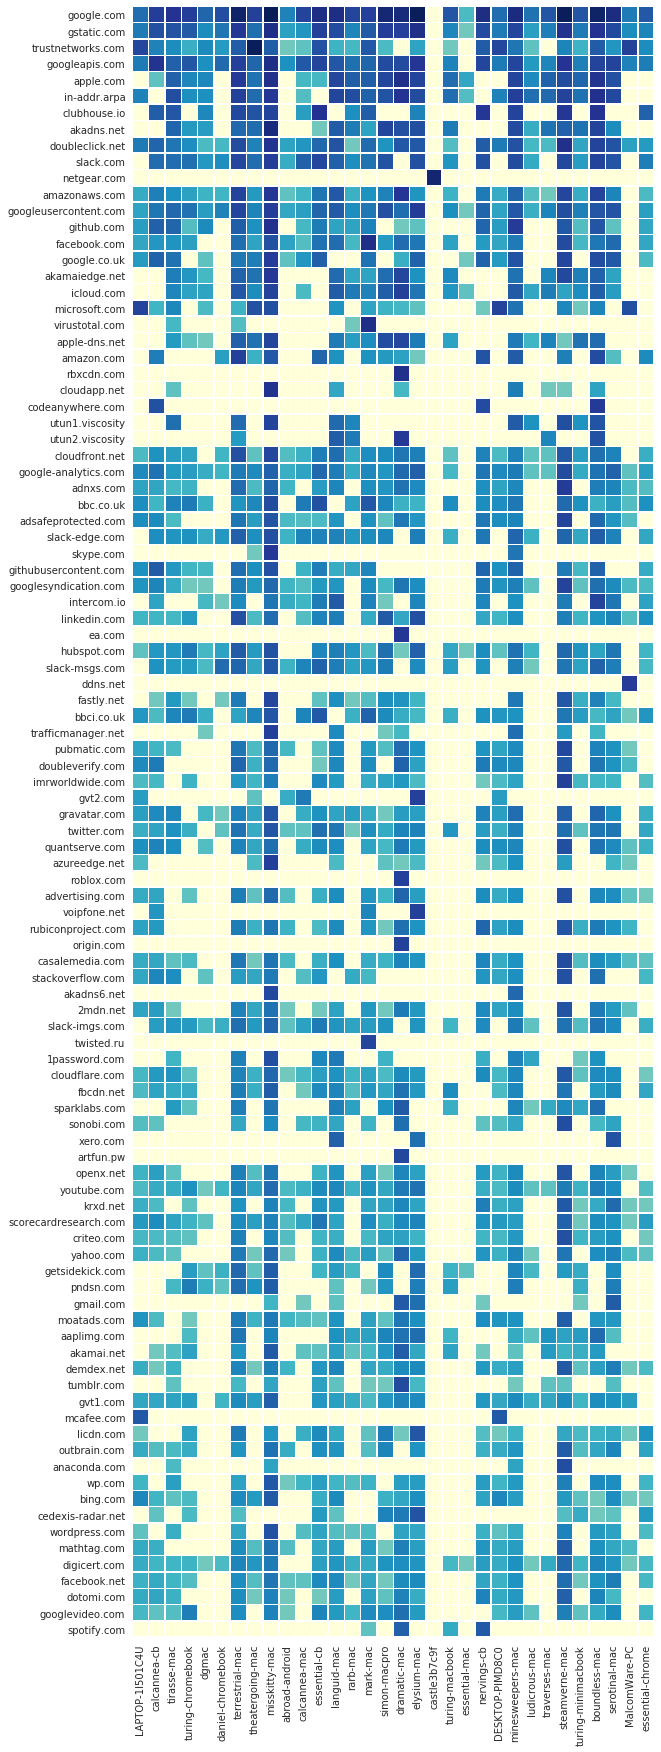

In [11]:
sns.set(style="white")
plt.figure(figsize=(20, 30))
sns.heatmap(df2[0:100][all_devices], square=True, linewidths=0.5, cbar=False, cmap="YlGnBu")
plt.show()

## User agents only in use on one device

In [12]:
df3 = df.copy()
df3 = df3.apply(lambda x: [1 if v > 0 else 0 for v in x])
df3["count"] = df3[all_devices].apply(np.count_nonzero, axis=1)
df3

,LAPTOP-1I501C4U,calcannea-cb,tirasse-mac,turing-chromebook,dgmac,daniel-chromebook,terrestrial-mac,theatergoing-mac,misskitty-mac,abroad-android,...,ludicrous-mac,traverses-mac,steamverne-mac,turing-minimacbook,boundless-mac,serotinal-mac,MalcomWare-PC,essential-chrome,score,count
foydgmjtneeto.local,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
lashback.com,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
mopinion.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
lightboxcdn.com,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,8
scottishrugby.org,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
fastly.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
cushmanwakefield.com,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
townnews.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
pythonprogramming.net,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
aapi.io,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


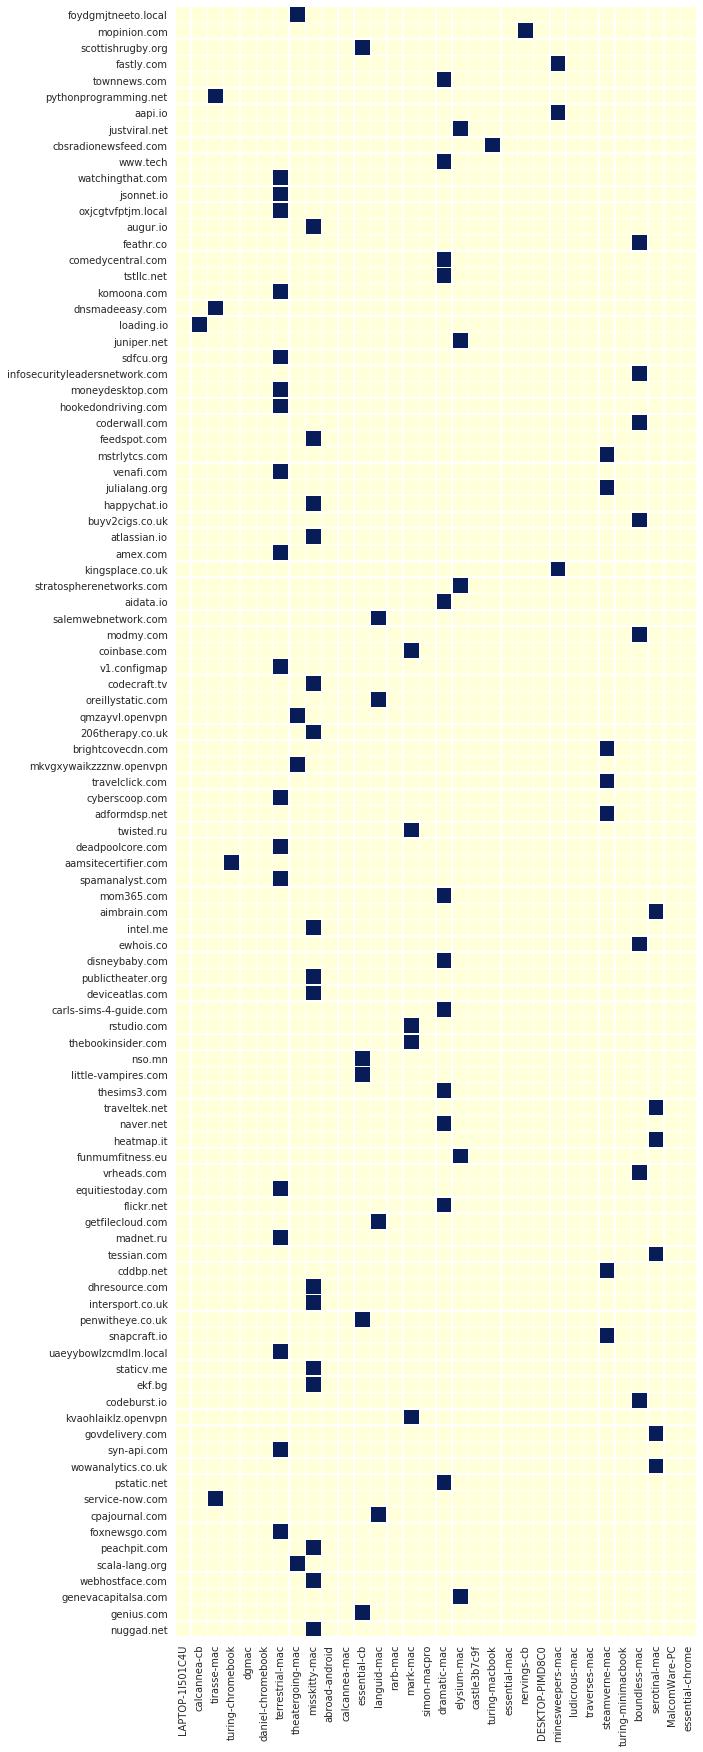

In [13]:
plt.figure(figsize=(20, 30))
sns.heatmap(df3[df3["count"] < 2][0:100][all_devices], square=True, linewidths=0.5, cbar=False, cmap="YlGnBu")
plt.show()

## Which devices have the highest number of unique user agents?

In [14]:
df3[df3["count"] < 2][all_devices].sum().to_frame("count").sort_values("count", ascending=False)

,count
misskitty-mac,695
dramatic-mac,486
terrestrial-mac,484
elysium-mac,344
serotinal-mac,329
essential-cb,284
steamverne-mac,248
boundless-mac,244
languid-mac,187
mark-mac,183


In [15]:
df3[df3["count"] < 2][all_devices].sum().to_frame("count").sort_values("count", ascending=True)

,count
LAPTOP-1I501C4U,0
ludicrous-mac,0
DESKTOP-PIMD8C0,0
essential-mac,0
castle3b7c9f,1
dgmac,2
daniel-chromebook,2
traverses-mac,9
calcannea-mac,10
turing-macbook,11
